# TASK 1

## MODEL EVALUATION



### Problem Statement: 
Evaluate the model's performance on the testing dataset using appropriate metrics (e.g., accuracy,
precision, recall).

Visualize the results with confusion matrices and classification reports.

### Evaluating Classification ML Models




<font color="Purple">

    1. Classification Accuracy

    2. Confusion Matrix

    3. F1 Score

    4. Precision And Recall

    5. ROC Curve

    6. Classication Report </font>

## Preprocesing and Ploting

In [6]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
sns.set()

In [2]:
# Reading the Dataset
clas_data = pd.read_csv('../input/health-care-data-set-on-heart-attack-possibility/heart.csv')

### Let's first find out details of our dataset

Looking it's description, info, a head look gives us a rough idea of our data.

In [3]:
def data_info(data):
    print('\t\t Data Info:')
    print(clas_data.info())
    print('\n\n\t\t Data Head:')
    print(clas_data.head())
    print('\n\n\t\t Data Describe:')
    print(clas_data.describe())
    print('\n\nData Shape: ',clas_data.shape)
    print('\n\n\t\t Null Values')
    print(clas_data.isna().sum())

In [4]:
data_info(clas_data)

		 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


		 Data Head:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       

### Now, let's have some visual information of our dataset

First, let us find out about our **target** column.

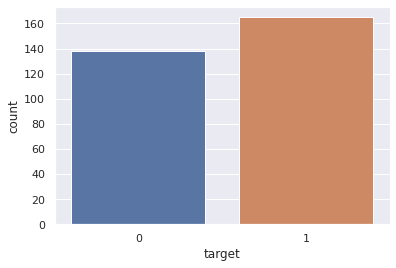

In [5]:
var = 'target'
sns.countplot(clas_data[var])

followed with **gender/sex** column

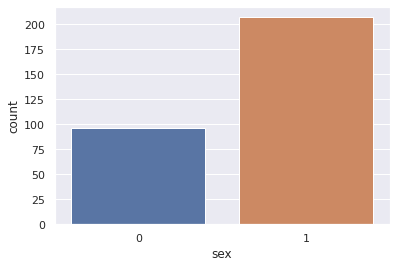

In [6]:
var = 'sex'
sns.countplot(clas_data[var])

(0.0, 80.0)

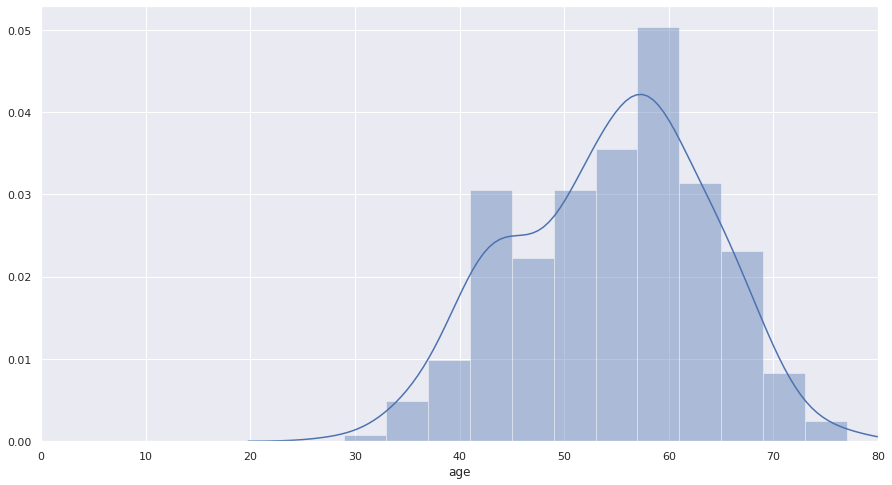

In [7]:
var = 'age'
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(clas_data[var])
plt.xlim([0,80])

Cleary most of dataset of person more than 40 year's of age. And it rises max in about 60.

Below, I ploted avout some more columns

(0.0, 600.0)

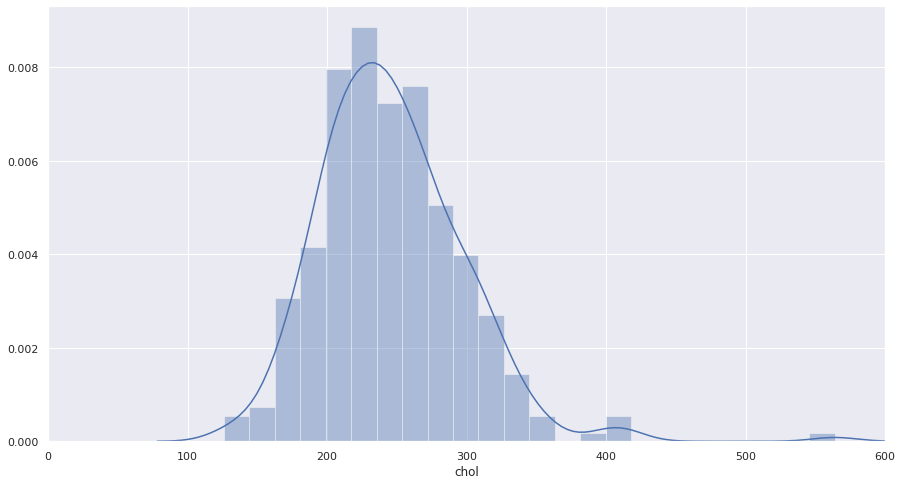

In [8]:
var = 'chol'
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(clas_data[var])
plt.xlim([0,600])

(0.0, 250.0)

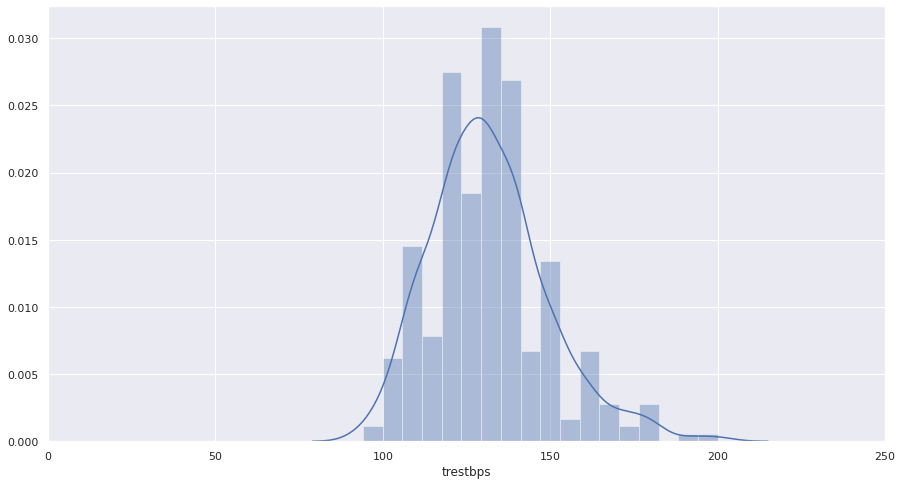

In [9]:
var = 'trestbps'
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(clas_data[var])
plt.xlim([0,250])

Now, comes the **heat map**

### Heat Map
A heat map (or heatmap) is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. The variation in color may be by hue or intensity, giving obvious visual cues to the reader about how the phenomenon is clustered or varies over space.

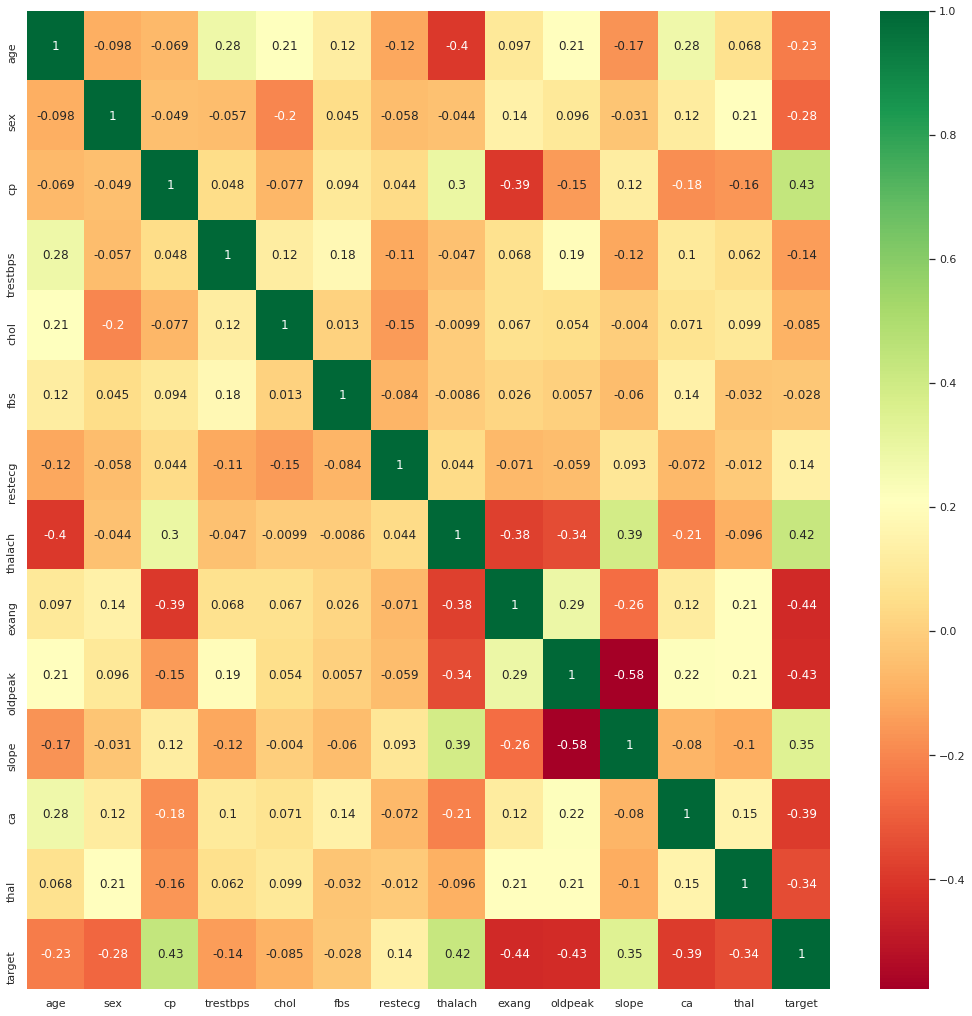

In [10]:
plt.figure(figsize=(18,18))
sns.heatmap(clas_data.corr(),annot=True,cmap='RdYlGn')

plt.show()

As given in data description, these 14 features are mostly used in all model. 

In [11]:
clas_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

At here I have just divided the dataset first to X and y.

Followed by spliting for **test and train sets**

In [12]:
X = clas_data.iloc[:,:-1]
y = clas_data.iloc[:,-1]
print("\n\n\t\tIndependent features of Dataset: ")
print(X.head())
print("\n\n\t\tDependent features of Dataset: ")
print(y.head())



		Independent features of Dataset: 
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  


		Dependent features of Dataset: 
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 25)

## Model Training

I used most basic Logistic Regression here (because our focus is on Evaluation rather than a well-trained model)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

## Evaluation of model

From here we are followed by the different ways we could evaluate our classification model.

### Model Accuracy
In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.


`Accuracy`: How correct we are in making our prediction. The formula is as follows:

*(True Positives + True Negatives)/Total Predictions*



<code>Accuracy</code> in classification problems is the number of correct predictions made by the model over all kinds predictions made

<img src="https://cdn-images-1.medium.com/max/1600/1*5XuZ_86Rfce3qyLt7XMlhw.png" width=600 >

In [16]:
from sklearn import metrics
print("Classification Model Accuracy is: ",metrics.accuracy_score(y_test, y_pred))

Classification Model Accuracy is:  0.7704918032786885


## 1. Confusion Matrix
A <code>confusion</code> matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known

<img src="https://i.ytimg.com/vi/AOIkPnKu0YA/maxresdefault.jpg" width=600 />


Most used in classification model

A confusion matrix is a summary of prediction results on a classification problem.

The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.

The confusion matrix shows the ways in which your classification model
is confused when it makes predictions.

It gives you insight not only into the errors being made by your classifier but more importantly the types of errors that are being made.

Let's now define the most basic terms, which are whole numbers (not rates):
* true positives (TP): These are cases in which we predicted yes (they have the disease), and they do have the disease.
* true negatives (TN): We predicted no, and they don't have the disease.
* false positives (FP): We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")
* false negatives (FN): We predicted no, but they actually do have the disease. (Also known as a "Type II error.")

In [17]:
! pip install -q scikit-plot

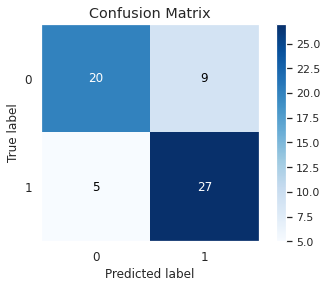

In [18]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,y_pred)

### Precision and Recall

`Precision`: Out of our predicted positives, how many did we get correct?

*True Positives/(True Positives + False Positives)* 

<code>Precision</code> is defined as the number of true positives divided by the number of true positives plus the number of false positives. Precision is about being precise


<img src="https://cdn-images-1.medium.com/max/640/1*KhlD7Js9leo0B0zfsIfAIA.png" width=600>


### Recall

When it is actually the positive result, how often does it predict correcly

`Recall`: Out of the actual positives, how many did we get correct?

*True Positives/(True Positives + False Negatives)*
Precision attempts to answer the following question:

*What proportion of positive identifications was actually correct?*

And,Recall attempts to answer the following question:

*What proportion of actual positives was identified correctly?*


<img src="https://cdn-images-1.medium.com/max/640/1*a8hkMGVHg3fl4kDmSIDY_A.png" width=600>

Average precision-recall score: 0.71


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.71')

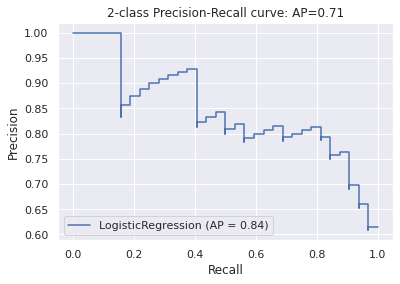

In [19]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
average_precision = average_precision_score(y_test, y_pred)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))
disp = plot_precision_recall_curve(log_reg, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

### F1 score
<code>F1 score</code> is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. <br>
Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, <code>especially if you have an uneven class distribution</code>

The F1 score is the harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall). The F1 score is also known as the Sørensen–Dice coefficient or Dice similarity coefficient (DSC).[](http://)

<img src="https://cdn-images-1.medium.com/max/1600/1*UJxVqLnbSj42eRhasKeLOA.png">

In [20]:
from sklearn.metrics import f1_score
print("Macro F1 Score: ",f1_score(y_test, y_pred, average='macro'))
print("Micro F1 Score: ",f1_score(y_test, y_pred, average='micro'))
print("Weighted F1 Score: ",f1_score(y_test, y_pred, average='weighted'))

Macro F1 Score:  0.7674291938997821
Micro F1 Score:  0.7704918032786885
Weighted F1 Score:  0.7687417407764563


### ROC Curve
ROC can be broken down into sensitivity and specificity. Choosing the best model is sort of a balance between predicting 1's accurately or 0's accurately. In other words sensitivity and specificity.

<code>AUC-ROC</code> curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. <br>
It tells how much model is capable of distinguishing between classes.<br>
Higher the AUC, better the model is at predicting 0s and 1s as 1as.<br>
By analogy, Higher the AUC, better the model is at distinguishing between survived and not

<img src="https://cdn-images-1.medium.com/max/1600/1*pk05QGzoWhCgRiiFbz-oKQ.png">

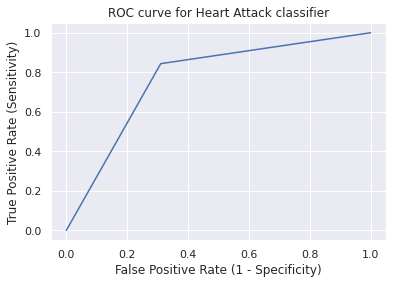

In [21]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.title('ROC curve for Heart Attack classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### Classification Report 
At the I am using classification Report by **sckit-learn** which basically report all important evaluation criteria.



In [22]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.80      0.69      0.74        29
     class 1       0.75      0.84      0.79        32

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61

